## Plotting time-distances

* Variables of trip times and travel speed


* The distance that can be reached within time intervals of 5 to 30 minutes

In [1]:
import osmnx as ox
ox.config(log_console = True, use_cache = True)
ox.__version__
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

In [2]:
import geopandas as gpd
import networkx as nx
from descartes import PolygonPatch
from shapely.geometry import Point, LineString, Polygon

In [3]:
Avcilar = "AVCILAR, Istanbul, Turkey"
Atasehir = "ATASEHIR, Istanbul, Turkey"
Esenyurt = "Esenyurt, Istanbul, Turkey"
Sultanbeyli = "Sultanbeyli, Istanbul, Turkey"
Bagcilar = "BAGCILAR, Istanbul, Turkey"
Bakirkoy = "BAKIRKÖY, Istanbul, Turkey"
Beykoz = "BEYKOZ, Istanbul, Turkey"
Beylikduzu = "BEYLIKDÜZÜ, Istanbul, Turkey"

In [4]:
network_type = 'walk'
trip_times = [5, 10, 15, 20, 25]
travel_speed = 4.5
fast_pace_travel_speed = 9.5

In [5]:
Avcilar_streets = ox.graph_from_place(Avcilar, network_type=network_type)

In [6]:
Avcilar_nodes = ox.graph_to_gdfs(Avcilar_streets, edges=False)
x, y = Avcilar_nodes['geometry'].unary_union.centroid.xy
center_node = ox.get_nearest_node(Avcilar_streets, (y[0], x[0]))
Avcilar_streets = ox.project_graph(Avcilar_streets)

In [7]:
meters_per_minute = travel_speed * 1000 / 60
for u, v, k, data in Avcilar_streets.edges(data=True, keys=True):
    data['time'] = data['length'] / meters_per_minute

In [8]:
iso_colors = ox.get_colors(n=len(trip_times), cmap='Reds', start=0.3, return_hex=True)

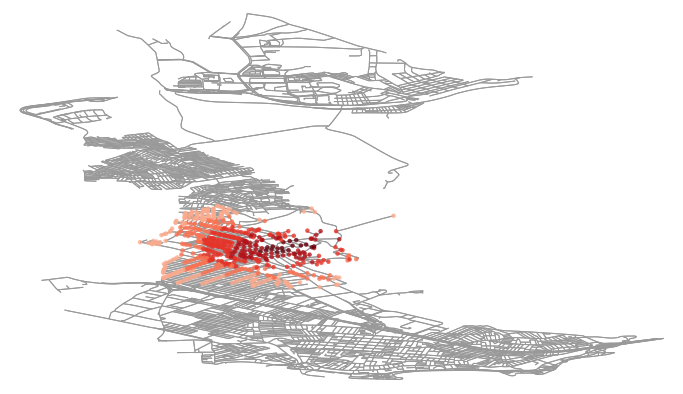

In [9]:
node_colors = {}

for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(Avcilar_streets, center_node, radius=trip_time, distance='time')
    for node in subgraph.nodes():
        node_colors[node] = color
nc = [node_colors[node] if node in node_colors else 'none' for node in Avcilar_streets.nodes()]
ns = [20 if node in node_colors else 0 for node in Avcilar_streets.nodes()]
fig, ax = ox.plot_graph(Avcilar_streets, fig_height=7, fig_width=12, node_color=nc, node_size=ns, node_alpha=0.8, node_zorder=2)

In [10]:
Bagcilar_streets = ox.graph_from_place(Bagcilar, network_type=network_type)

In [11]:
Bagcilar_nodes = ox.graph_to_gdfs(Bagcilar_streets, edges=False)
x, y = Bagcilar_nodes['geometry'].unary_union.centroid.xy
center_node = ox.get_nearest_node(Bagcilar_streets, (y[0], x[0]))
Bagcilar_streets = ox.project_graph(Bagcilar_streets)

In [12]:
meters_per_minute = travel_speed * 1000 / 60
for u, v, k, data in Bagcilar_streets.edges(data=True, keys=True):
    data['time'] = data['length'] / meters_per_minute

In [13]:
iso_colors = ox.get_colors(n=len(trip_times), cmap='Reds', start=0.3, return_hex=True)

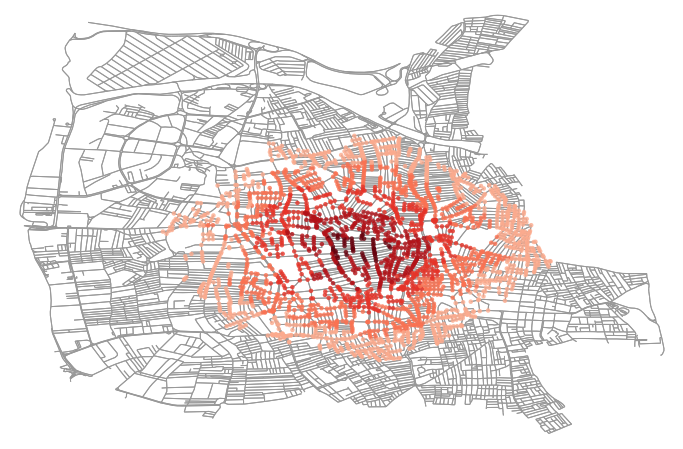

In [14]:
node_colors = {}

for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(Bagcilar_streets, center_node, radius=trip_time, distance='time')
    for node in subgraph.nodes():
        node_colors[node] = color
nc = [node_colors[node] if node in node_colors else 'none' for node in Bagcilar_streets.nodes()]
ns = [20 if node in node_colors else 0 for node in Bagcilar_streets.nodes()]
fig, ax = ox.plot_graph(Bagcilar_streets, fig_height=8, fig_width=12, node_color=nc, node_size=ns, node_alpha=0.8, node_zorder=2)

In [15]:
isochrone_polys2 = []

for trip_time in sorted(trip_times, reverse=True):
    subgraph = nx.ego_graph(Bagcilar_streets, center_node, radius=trip_time, distance='time')
    node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
    bounding_poly = gpd.GeoSeries(node_points).unary_union.convex_hull
    isochrone_polys2.append(bounding_poly)

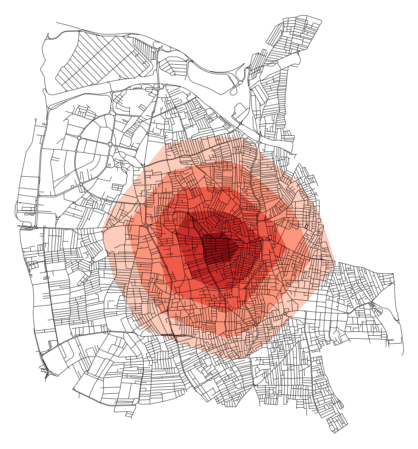

In [16]:
fig, ax = ox.plot_graph(Bagcilar_streets, fig_height=8, show=False, close=False, edge_color='k', edge_alpha=0.2, node_color='none')

for polygon, fc in zip(isochrone_polys2, iso_colors):
    patch = PolygonPatch(polygon, fc=fc, ec='none', alpha=0.6, zorder=-1)
    ax.add_patch(patch)
    
plt.show()

In [17]:
Beylikduzu_streets = ox.graph_from_place(Beylikduzu, network_type=network_type)

In [18]:
Beylikduzu_nodes = ox.graph_to_gdfs(Beylikduzu_streets, edges=False)
x, y = Beylikduzu_nodes['geometry'].unary_union.centroid.xy
center_node = ox.get_nearest_node(Beylikduzu_streets, (y[0], x[0]))
Beylikduzu_streets = ox.project_graph(Beylikduzu_streets)

In [19]:
meters_per_minute = fast_pace_travel_speed * 1000 / 60
for u, v, k, data in Beylikduzu_streets.edges(data=True, keys=True):
    data['time'] = data['length'] / meters_per_minute

In [20]:
iso_colors = ox.get_colors(n=len(trip_times), cmap='Reds', start=0.3, return_hex=True)

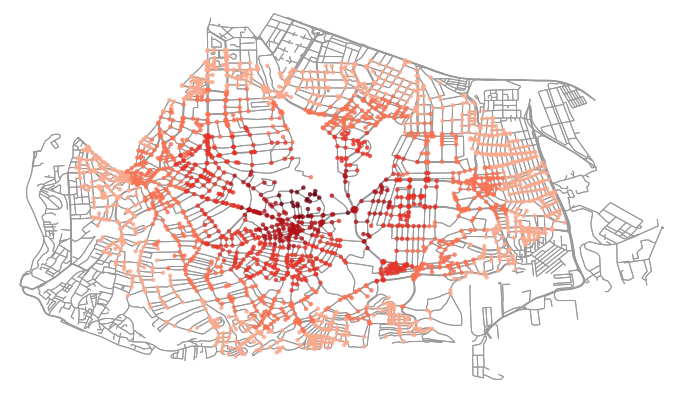

In [21]:
node_colors = {}

for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(Beylikduzu_streets, center_node, radius=trip_time, distance='time')
    for node in subgraph.nodes():
        node_colors[node] = color
nc = [node_colors[node] if node in node_colors else 'none' for node in Beylikduzu_streets.nodes()]
ns = [20 if node in node_colors else 0 for node in Beylikduzu_streets.nodes()]
fig, ax = ox.plot_graph(Beylikduzu_streets, fig_height=7, fig_width=12, node_color=nc, node_size=ns, node_alpha=0.8, node_zorder=2)

In [22]:
isochrone_polys = []

for trip_time in sorted(trip_times, reverse=True):
    subgraph = nx.ego_graph(Beylikduzu_streets, center_node, radius=trip_time, distance='time')
    node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
    bounding_poly = gpd.GeoSeries(node_points).unary_union.convex_hull
    isochrone_polys.append(bounding_poly)

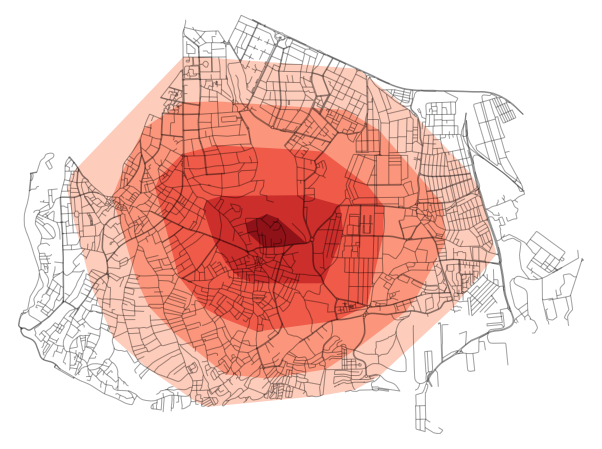

In [23]:
fig, ax = ox.plot_graph(Beylikduzu_streets, fig_height=8, show=False, close=False, edge_color='k', edge_alpha=0.2, node_color='none')

for polygon, fc in zip(isochrone_polys, iso_colors):
    patch = PolygonPatch(polygon, fc=fc, ec='none', alpha=0.6, zorder=-1)
    ax.add_patch(patch)
    
plt.show()

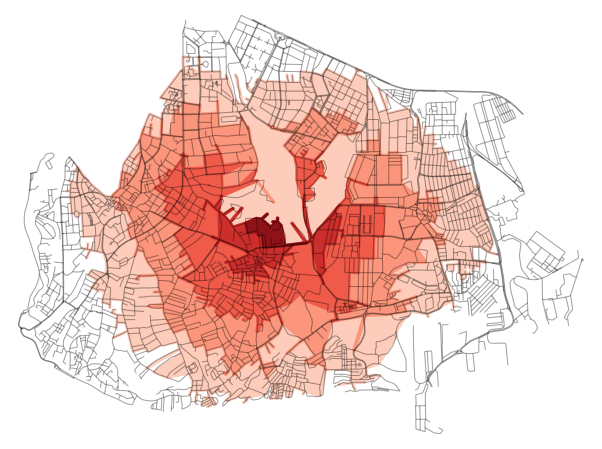

In [24]:
def make_iso_polys(Beylikduzu_streets, edge_buff=25, node_buff=50, infill=False):
    
    isochrone_polys = []
    
    for trip_time in sorted(trip_times, reverse=True):
        subgraph = nx.ego_graph(Beylikduzu_streets, center_node, radius=trip_time, distance='time')

        node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
        nodes_gdf = gpd.GeoDataFrame({'id': subgraph.nodes()}, geometry=node_points)
        nodes_gdf = nodes_gdf.set_index('id')

        edge_lines = []
        
        for n_fr, n_to in subgraph.edges():
            f = nodes_gdf.loc[n_fr].geometry
            t = nodes_gdf.loc[n_to].geometry
            edge_lines.append(LineString([f,t]))

        n = nodes_gdf.buffer(node_buff).geometry
        e = gpd.GeoSeries(edge_lines).buffer(edge_buff).geometry
        all_gs = list(n) + list(e)
        new_iso = gpd.GeoSeries(all_gs).unary_union
        
        if infill:
            new_iso = Polygon(new_iso.exterior)
        isochrone_polys.append(new_iso)
    return isochrone_polys

isochrone_polys = make_iso_polys(Beylikduzu_streets, edge_buff=25, node_buff=0, infill=True)
fig, ax = ox.plot_graph(Beylikduzu_streets, fig_height=8, show=False, close=False, edge_color='k', edge_alpha=0.2, node_color='none')
for polygon, fc in zip(isochrone_polys, iso_colors):
    patch = PolygonPatch(polygon, fc=fc, ec='none', alpha=0.6, zorder=-1)
    ax.add_patch(patch)
plt.show()